In [1]:
import numpy as np
import os

In [2]:
CurrentPath = os.getcwd()
data_1 = np.loadtxt(CurrentPath + '/2025/data_1.txt', delimiter=' ')
data_2 = np.loadtxt(CurrentPath + '/2025/data_2.txt', delimiter=' ')

### Fitting with function

In [3]:
def func_1(x,parameter): # define a quadratic function
    return parameter[0]*x**2 + parameter[1]*x + parameter[2]
def chisq(func, x, y, var,params = None): # returns chi-square value for the estimation
    dof = len(x)
    if params is not None:
        arr_exp = func(x,params)
    else:
        arr_exp = func(x)
    chisquared = np.sum((y - arr_exp)**2/var)
    return chisquared

In [4]:
from scipy.optimize import minimize

data_1_X = data_1.T[0];data_1_Y = data_1.T[1]; data_1_var = data_1.T[2]
data_2_X = data_2.T[0];data_2_Y = data_2.T[1]; data_2_var = data_2.T[2]
def objective1(params): # creates a function that can be put into scipy.optimize.minimize as an argument
    return chisq(func_1, data_1_X, data_1_Y, data_1_var, params)
def objective2(params):
    return chisq(func_1, data_2_X, data_2_Y, data_2_var, params)


In [55]:
initial = np.array([4,3,1])
result1= minimize(objective1, initial)
result2 = minimize(objective2, initial)

### calculating p-value

In [56]:
from scipy.stats import chi2

dof_1 = len(data_1_X)
dof_2 = len(data_2_X)
p_val_1 = chi2.sf(result1.fun, df=dof_1)
p_val_2 = chi2.sf(result2.fun, df=dof_2)

In [85]:
print(f"""
      data_1 result of a quadratic func chisq fitting:
      success : {result1.success}
      chisq per dof : {result1.fun / len(data_1_X)}
      p-value : {p_val_1}
      """)
print(f"func : {result1.x[0]:.2f}x^2 + {result1.x[1]:.2f}x + {result1.x[2]:.2f}")
print(f"""
      data_2 result of a quadratic func chisq fitting:
      success : {result2.success}
      chisq per dof : {result2.fun / len(data_2_X)}
      p-value : {p_val_2}
      """)
print(f"func : {result2.x[0]:.2f}x^2 + {result2.x[1]:.2f}x$ + ${result2.x[2]:.2f}")


      data_1 result of a quadratic func chisq fitting:
      success : False
      chisq per dof : 470547769.35139555
      p-value : 0.0
      
func : 102.84x^2 + -3808.76x + 28199.59

      data_2 result of a quadratic func chisq fitting:
      success : True
      chisq per dof : 0.2103654906193602
      p-value : 0.9999907559369048
      
func : 11.54x^2 + 1.99x$ + $4.67


### Another function

In [72]:
def cube(x,params):
    return params[0]*x**3 + params[1]*x**2 + params[2]*x + params[3]
def cube_data1(params): # creates a function that can be put into scipy.optimize.minimize as an argument
    return chisq(cube, data_1_X, data_1_Y, data_1_var, params)
def cube_data2(params):
    return chisq(cube, data_2_X, data_2_Y, data_2_var, params)

In [83]:
initial2 = np.array([1,2,1,1])
resultcube1= minimize(cube_data1, initial2, tol=100)
resultcube2 = minimize(cube_data2, initial2)
p_val_cube_1 = chi2.sf(resultcube1.fun, df=dof_1)
p_val_cube_2 = chi2.sf(resultcube2.fun, df=dof_2)

In [86]:
print(f"""
      data_1 result of cubic func chisq fitting:
      success : {resultcube1.success}
      chisq per dof : {resultcube1.fun / len(data_1_X)}
      p-value : {p_val_cube_1}
      """)
print(f"func : {resultcube1.x[0]:.2f}x^3 + {resultcube1.x[1]:.2f}x^2 + {resultcube1.x[2]:.2f}x + {resultcube1.x[3]}")
print(f"""
      data_2 result of cubic func chisq fitting:
      success : {resultcube2.success}
      chisq per dof : {resultcube2.fun / len(data_2_X)}
      p-value : {p_val_cube_2}
      """)
print(f"func : {resultcube2.x[0]:.2f}x^3 + {resultcube2.x[1]:.2f}x^2 + {resultcube2.x[2]:.2f}x + {resultcube2.x[3]}")


      data_1 result of cubic func chisq fitting:
      success : True
      chisq per dof : 0.13526144110947053
      p-value : 0.9999999126733733
      
func : 0.75x^3 + -2.50x^2 + 6.78x + 17.147718628224766

      data_2 result of cubic func chisq fitting:
      success : True
      chisq per dof : 0.2089545943035923
      p-value : 0.999991364008058
      
func : 1.22x^3 + 9.76x^2 + 2.69x + 4.604290522784588


### Plotting two results

Text(0.5, 1.0, 'data_2')

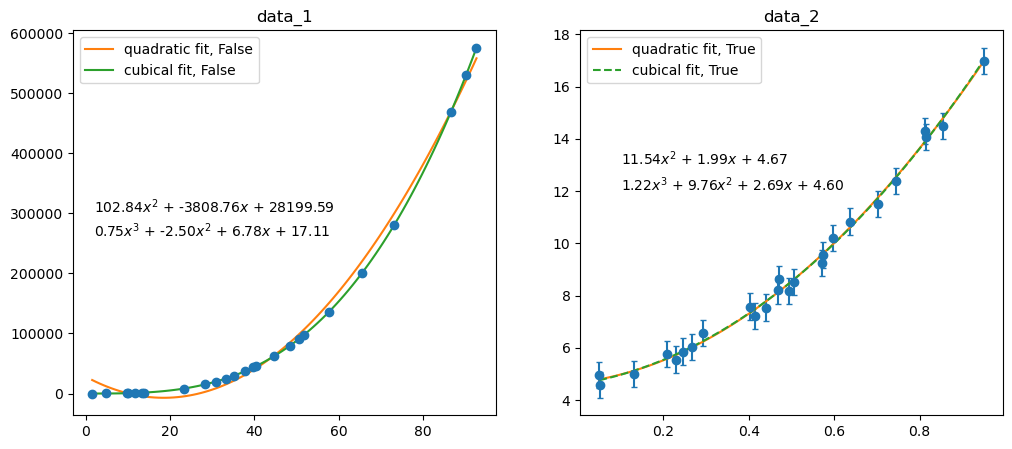

In [43]:
import matplotlib.pyplot as plt
xarr1 = np.linspace(data_1_X[0], data_1_X[-1], 100)
xarr2 = np.linspace(data_2_X[0], data_2_X[-1], 100)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.errorbar(data_1_X, data_1_Y, yerr = np.sqrt(data_1_var), fmt = 'o', capsize=2)
ax1.plot(xarr1, func_1(xarr1, result1.x), label = f'quadratic fit, {result1.success}')
ax1.plot(xarr1, cube(xarr1, resultcube1.x), label = f'cubical fit, {resultcube1.success}')
ax1.text(2, 300000, rf"{result1.x[0]:.2f}$x^2$ + {result1.x[1]:.2f}$x$ + {result1.x[2]:.2f}")
ax1.text(2, 260000, rf"{resultcube1.x[0]:.2f}$x^3$ + {resultcube1.x[1]:.2f}$x^2$ + {resultcube1.x[2]:.2f}$x$ + {resultcube1.x[3]:.2f}")
ax1.legend()
ax1.set_title('data_1')

ax2.errorbar(data_2_X, data_2_Y, yerr = np.sqrt(data_2_var), fmt = 'o', capsize=2)
ax2.plot(xarr2, func_1(xarr2, result2.x), label = f'quadratic fit, {result2.success}')
ax2.plot(xarr2, cube(xarr2, resultcube2.x), label = f'cubical fit, {resultcube2.success}', linestyle ='dashed')
ax2.legend()
ax2.text(0.1, 13, rf"{result2.x[0]:.2f}$x^2$ + {result2.x[1]:.2f}$x$ + {result2.x[2]:.2f}")
ax2.text(0.1, 12, rf"{resultcube2.x[0]:.2f}$x^3$ + {resultcube2.x[1]:.2f}$x^2$ + {resultcube2.x[2]:.2f}$x$ + {resultcube2.x[3]:.2f}")
ax2.set_title('data_2')


### Let's make error bars to the two parameters